In [1]:
# Importh the necessary modules
import geopandas as gpd

In [2]:
# Reading the data from the borders shapefile
# Coords in EPSG 4326 convention = decimal lat. long = WGS84
fileName = "Data/Europe_borders.shp"
data = gpd.read_file(fileName)
data.crs

{'init': 'epsg:4326'}

In [3]:
# We have a 'geometry' column containing polygons
data['geometry'].head()

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object

In [4]:
# Make a copy of our data and re-project into Lambert Azimuthal Equal Area projection (EPSG: 3035).
dataProj = data.copy()
dataProj = dataProj.to_crs(epsg=3035)

# Note that the coordinates have changed
data['geometry'].head()

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object

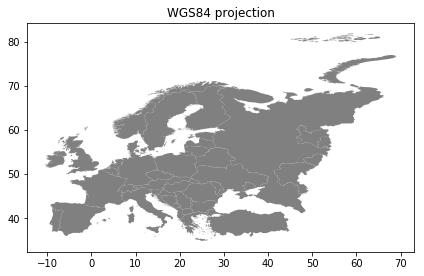

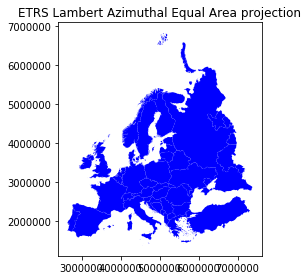

In [5]:
# Plot the data to see the change in projection visually
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the WGS84
data.plot(facecolor='gray');
plt.title("WGS84 projection");
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
dataProj.plot(facecolor='blue');
plt.title("ETRS Lambert Azimuthal Equal Area projection");
plt.tight_layout()

In [6]:
# Now we can update the coordinate system definition in the header and save the file
from fiona.crs import from_epsg
dataProj.crs = from_epsg(3035)
outFile = r"Data/Europe_borders_epsg3035.shp"
dataProj.to_file(outFile)

